In [77]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [14]:
pip install yfinance

In [15]:
import yfinance as yf

In [16]:
ticker = "BERGEPAINT.NS"

In [33]:
data = yf.download(ticker, start="2021-07-24", end="2024-07-22")

[*********************100%%**********************]  1 of 1 completed


In [34]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-26,708.333313,714.958313,704.083313,708.125000,699.370239,807918
2021-07-27,709.208313,713.333313,696.458313,703.000000,694.308594,600895
2021-07-28,703.291687,710.000000,694.458313,708.625000,699.864075,880394
2021-07-29,711.833313,714.291687,703.625000,704.583313,695.872375,756740
2021-07-30,708.250000,711.250000,701.833313,702.958313,694.267456,718639


In [35]:
df = data[['Adj Close']]
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


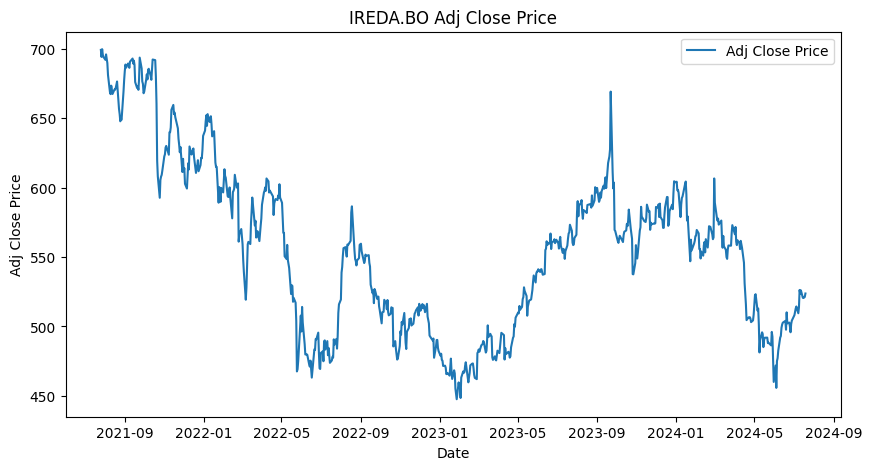

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('IREDA.BO Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose



In [38]:
df.columns

Index(['Adj Close'], dtype='object')

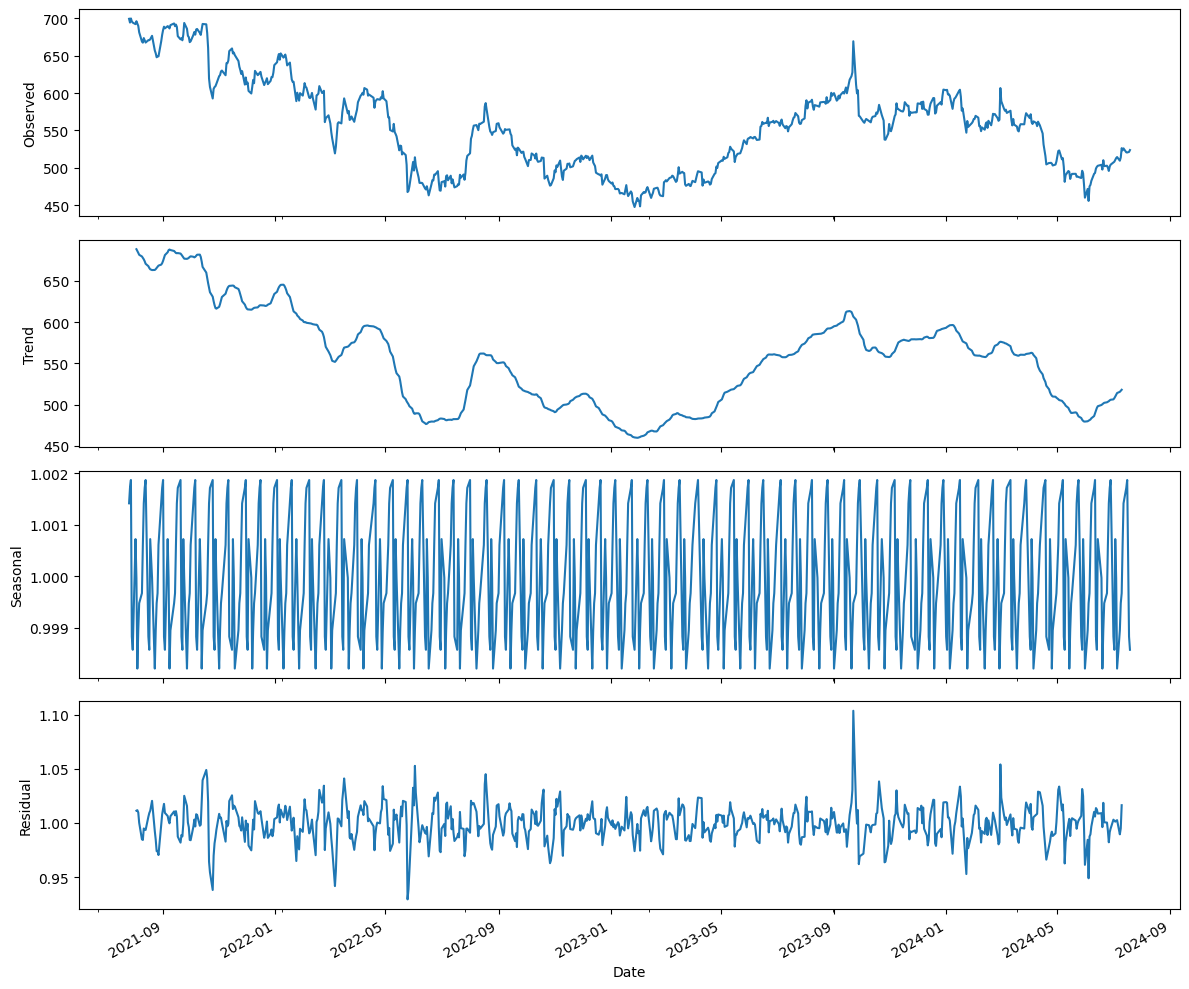

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [40]:
monthly_data = df.resample("M").mean()

In [41]:
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [42]:
len(monthly_data), len(train_data)

(37, 29)

In [43]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing



In [46]:
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()



In [47]:
holt_winters_forecast = holt_winters_model.forecast(12)

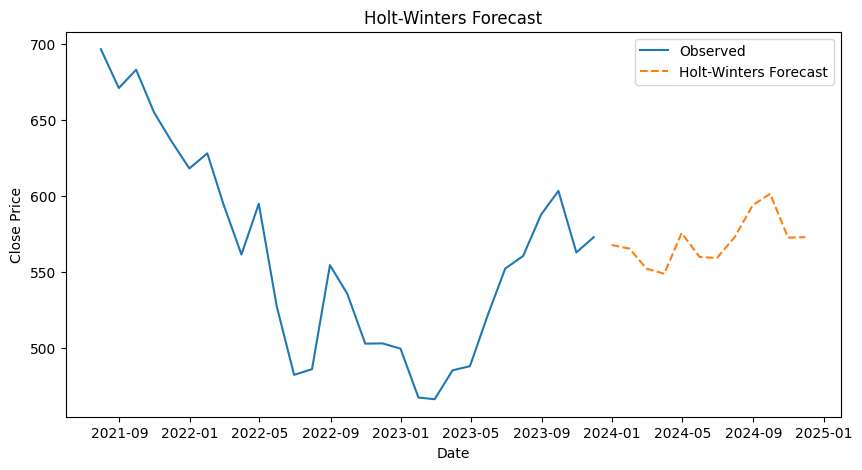

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [49]:
y_pred = holt_winters_model.forecast(8)

In [50]:
len(test_data), len(y_pred)


(8, 8)

In [51]:
y_pred, test_data

(2023-12-31    567.889205
 2024-01-31    565.463721
 2024-02-29    552.330251
 2024-03-31    548.946516
 2024-04-30    575.791141
 2024-05-31    560.005384
 2024-06-30    559.267878
 2024-07-31    573.241274
 Freq: M, dtype: float64,
              Adj Close
 Date                  
 2023-12-31  584.007495
 2024-01-31  583.766666
 2024-02-29  563.795242
 2024-03-31  565.658332
 2024-04-30  534.652507
 2024-05-31  493.740477
 2024-06-30  493.105262
 2024-07-31  517.050003)

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')


mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')

r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 42.75497600438246
MAE: 36.544433698890394
MAPE: nan
R-squared: -0.47121887596299916


In [53]:
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [54]:
holt_winters_forecast

2023-12-31    567.889205
2024-01-31    565.463721
2024-02-29    552.330251
2024-03-31    548.946516
2024-04-30    575.791141
2024-05-31    560.005384
2024-06-30    559.267878
2024-07-31    573.241274
2024-08-31    594.105596
2024-09-30    601.595267
2024-10-31    572.699103
2024-11-30    573.010004
2024-12-31    567.889205
2025-01-31    565.463721
2025-02-28    552.330251
2025-03-31    548.946516
2025-04-30    575.791141
2025-05-31    560.005384
2025-06-30    559.267878
2025-07-31    573.241274
Freq: M, dtype: float64

In [55]:
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [57]:
!pip install pmdarima
from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.6 MB/s eta 0:00:00


In [58]:
from pmdarima import auto_arima

In [59]:
arima_model = auto_arima(train_data['Adj Close'],
                         seasonal=True,
                         m=12,  # Monthly seasonality
                         stepwise=True,
                         suppress_warnings=True)


print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   29
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -134.691
Date:                Mon, 22 Jul 2024   AIC                            271.382
Time:                        10:20:33   BIC                            272.715
Sample:                    07-31-2021   HQIC                           271.790
                         - 11-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       882.5942    252.469      3.496      0.000     387.763    1377.425
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.89   Pr

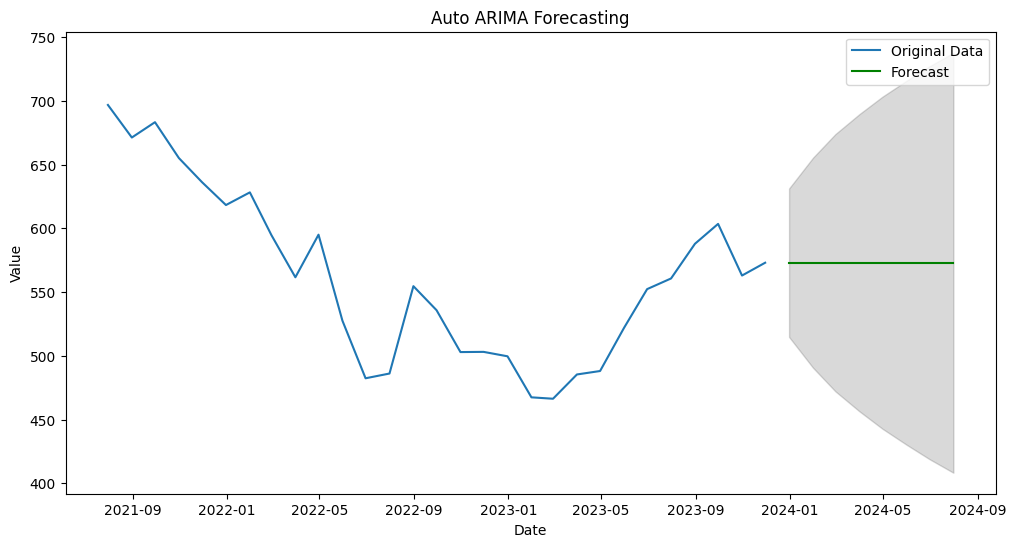

In [60]:
n_periods = 8


forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)


plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index,
                 conf_int[:, 0],
                 conf_int[:, 1],
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [61]:
len(forecast)

8

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')


mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')


mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')

r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 46.96654977898182
MAE: 36.476544128105665
MAPE: nan
R-squared: -0.7753389009069551


In [63]:
daily_data= df.copy()

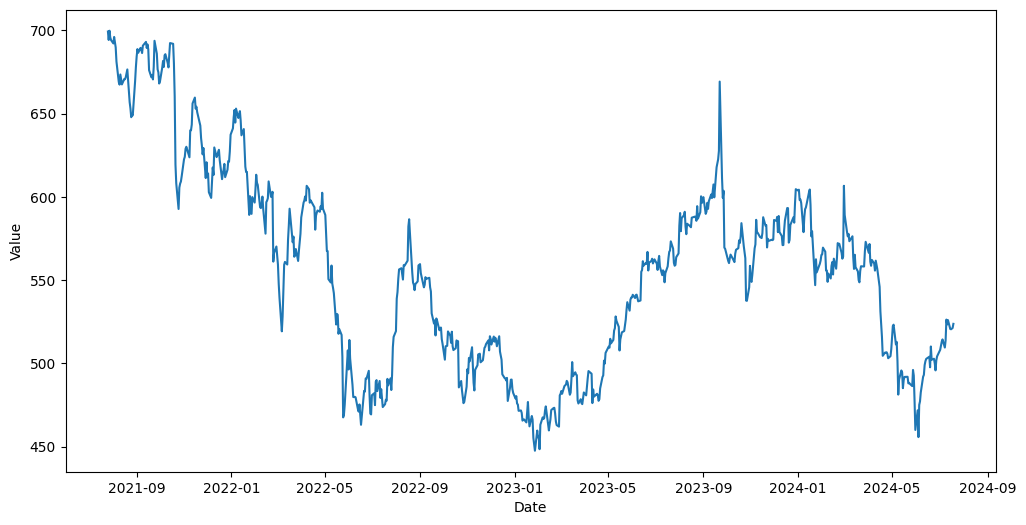

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [65]:
arima_model = auto_arima(daily_data['Adj Close'],
                         seasonal=True,
                         m=7,
                         stepwise=True,
                         suppress_warnings=True)

In [66]:
print(arima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  737
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 7)   Log Likelihood               -2623.902
Date:                             Mon, 22 Jul 2024   AIC                           5251.803
Time:                                     10:26:50   BIC                           5261.006
Sample:                                          0   HQIC                          5255.352
                                             - 737                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L7       -0.0851      0.037     -2.321      0.020      -0.157      -0.013
sigma2        73.1288      

In [67]:
fitted_values = arima_model.predict_in_sample()

In [68]:
fitted_values

Date
2021-07-26      0.000000
2021-07-27    699.370239
2021-07-28    694.308594
2021-07-29    699.864075
2021-07-30    695.872375
                 ...    
2024-07-12    523.174342
2024-07-15    525.823539
2024-07-16    520.559805
2024-07-18    520.872682
2024-07-19    520.865963
Name: predicted_mean, Length: 737, dtype: float64

In [74]:
n_periods = 60


forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [75]:
len(forecast)

60

In [79]:
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

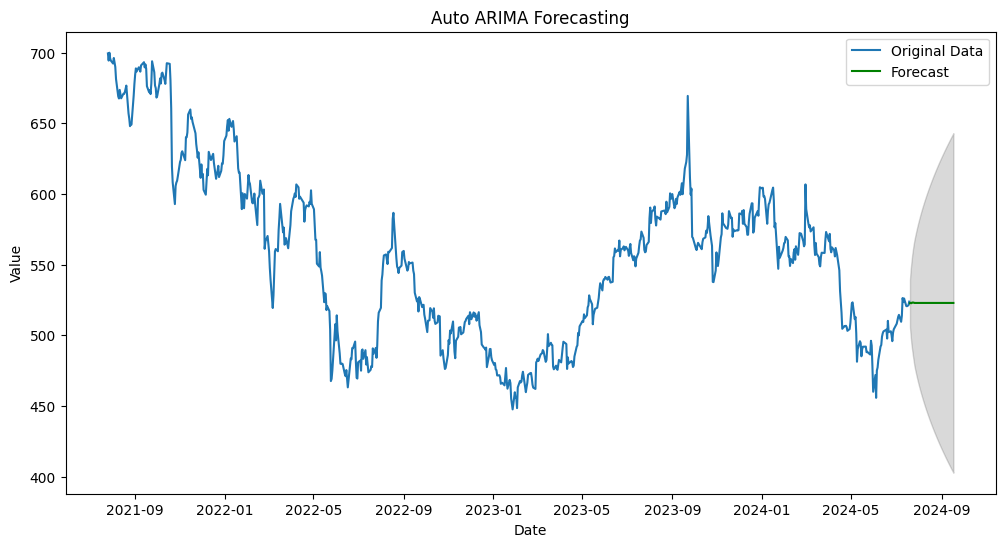

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates,
                 conf_int_df['lower_bound'],
                 conf_int_df['upper_bound'],
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [81]:
pip install tensorflow

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [83]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-26,708.333313,714.958313,704.083313,708.125000,699.370239,807918
2021-07-27,709.208313,713.333313,696.458313,703.000000,694.308594,600895
2021-07-28,703.291687,710.000000,694.458313,708.625000,699.864075,880394
2021-07-29,711.833313,714.291687,703.625000,704.583313,695.872375,756740
2021-07-30,708.250000,711.250000,701.833313,702.958313,694.267456,718639


In [84]:
scaler = MinMaxScaler()


features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]


scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)


scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [85]:
import numpy as np


def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])
    return np.array(sequences), np.array(labels)


data_array = scaled_df.values


target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30


X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (707, 30, 6)
Shape of y: (707,)


In [86]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            11400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31651 (123.64 KB)
Trainable params: 31651 (123.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)


loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
18/18 [==============================] - 6s 87ms/step - loss: 0.0865 - val_loss: 0.0045
Epoch 2/20
18/18 [==============================] - 1s 34ms/step - loss: 0.0102 - val_loss: 0.0041
Epoch 3/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0115 - val_loss: 0.0040
Epoch 4/20
18/18 [==============================] - 1s 34ms/step - loss: 0.0089 - val_loss: 0.0038
Epoch 5/20
18/18 [==============================] - 1s 57ms/step - loss: 0.0098 - val_loss: 0.0039
Epoch 6/20
18/18 [==============================] - 1s 53ms/step - loss: 0.0090 - val_loss: 0.0036
Epoch 7/20
18/18 [==============================] - 1s 53ms/step - loss: 0.0075 - val_loss: 0.0036
Epoch 8/20
18/18 [==============================] - 1s 55ms/step - loss: 0.0092 - val_loss: 0.0036
Epoch 9/20
18/18 [==============================] - 1s 38ms/step - loss: 0.0083 - val_loss: 0.0036
Epoch 10/20
18/18 [==============================] - 1s 35ms/step - loss: 0.0094 - val_loss: 0.0036
Epoch 11/

In [89]:
y_pred = model.predict(X_test)


y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

5/5 [==============================] - 2s 22ms/step


In [90]:
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 572.8760573546533, True Value: 593.25
Prediction: 575.0219383255826, True Value: 572.5499877929688
Prediction: 575.7914184651527, True Value: 574.1500244140625
Prediction: 574.9485098259465, True Value: 583.1500244140625
Prediction: 574.382484687314, True Value: 587.7999877929688
Prediction: 574.6341149206019, True Value: 584.5499877929688
Prediction: 575.117822529839, True Value: 596.0999755859375
Prediction: 576.4626680575857, True Value: 604.6500244140625
Prediction: 579.0948285905251, True Value: 603.8499755859375
Prediction: 582.2891488126079, True Value: 604.3499755859375


In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')


mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')


mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')

r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 13.83432298480578
MAE: 10.585941423414159
MAPE: 1.9662540911164952
R-squared: 0.8714739670509937


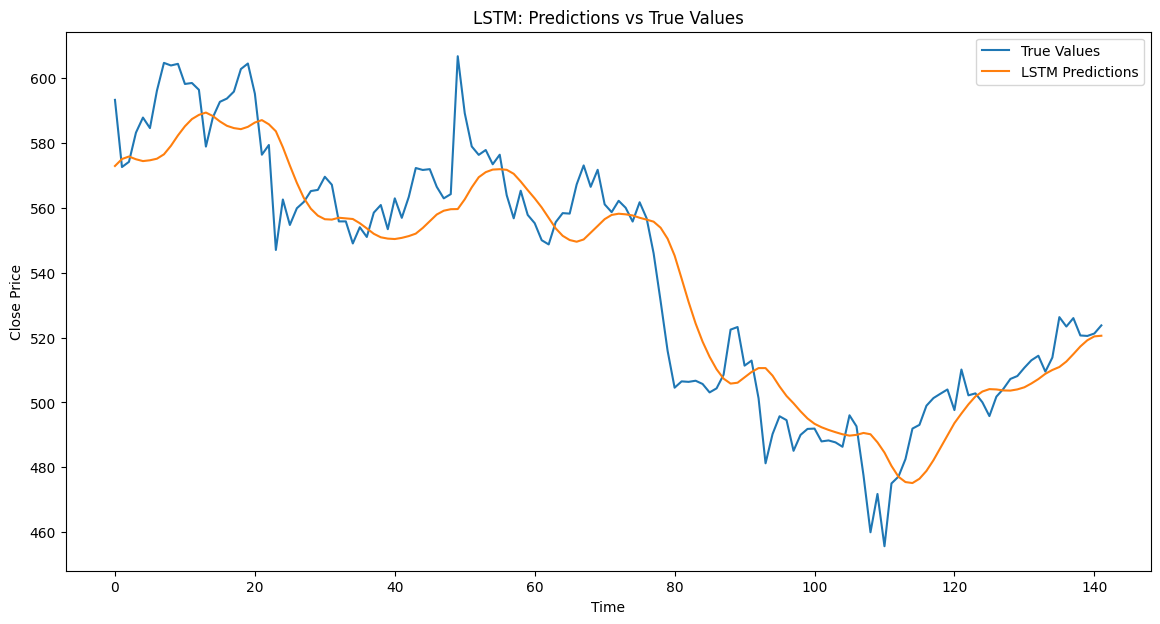

In [92]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [93]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [94]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.

    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]

    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [96]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)


mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.002561679630014269


In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')


mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')


mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')

r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.05061303814250108
MAE: 0.034957242149790284
MAPE: 221503.5973058268
R-squared: 0.9502241985281223


In [98]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.0013353665166383544


In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.03654266707067718
MAE: 0.024882825811313097
MAPE: 209222.75723134918
R-squared: 0.9740525950842599


In [100]:
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.46098958843541094, True Value: 0.5405119795275912
Prediction: 0.7812819201106824, True Value: 0.7938822231816649
Prediction: 0.6688600007981915, True Value: 0.6883332184420989
Prediction: 0.17537675254484086, True Value: 0.14193384925544428
Prediction: 0.16715864302567884, True Value: 0.17208953292480422
Prediction: 0.16600791661073266, True Value: 0.1467773008783737
Prediction: 0.4390173050386459, True Value: 0.39513199793437637
Prediction: 0.16945961210300542, True Value: 0.16913102317295725
Prediction: 0.14825661622336783, True Value: 0.13214898611509196
Prediction: 0.4862359091948061, True Value: 0.44303438634172987


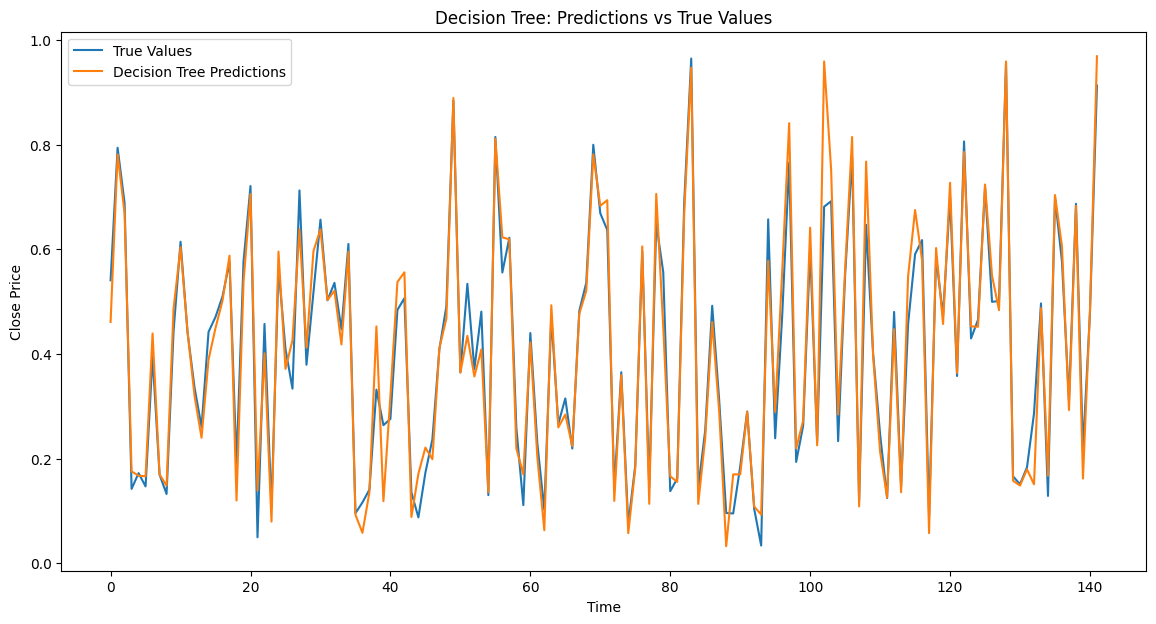

In [101]:
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [102]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.5080307231254286, True Value: 0.5405119795275912
Prediction: 0.7433531309070723, True Value: 0.7938822231816649
Prediction: 0.6914271402120526, True Value: 0.6883332184420989
Prediction: 0.1749026714026044, True Value: 0.14193384925544428
Prediction: 0.1625511501821933, True Value: 0.17208953292480422
Prediction: 0.15865780190090567, True Value: 0.1467773008783737
Prediction: 0.4125238604905978, True Value: 0.39513199793437637
Prediction: 0.1546158617628668, True Value: 0.16913102317295725
Prediction: 0.13875452097006893, True Value: 0.13214898611509196
Prediction: 0.49187564656553806, True Value: 0.44303438634172987


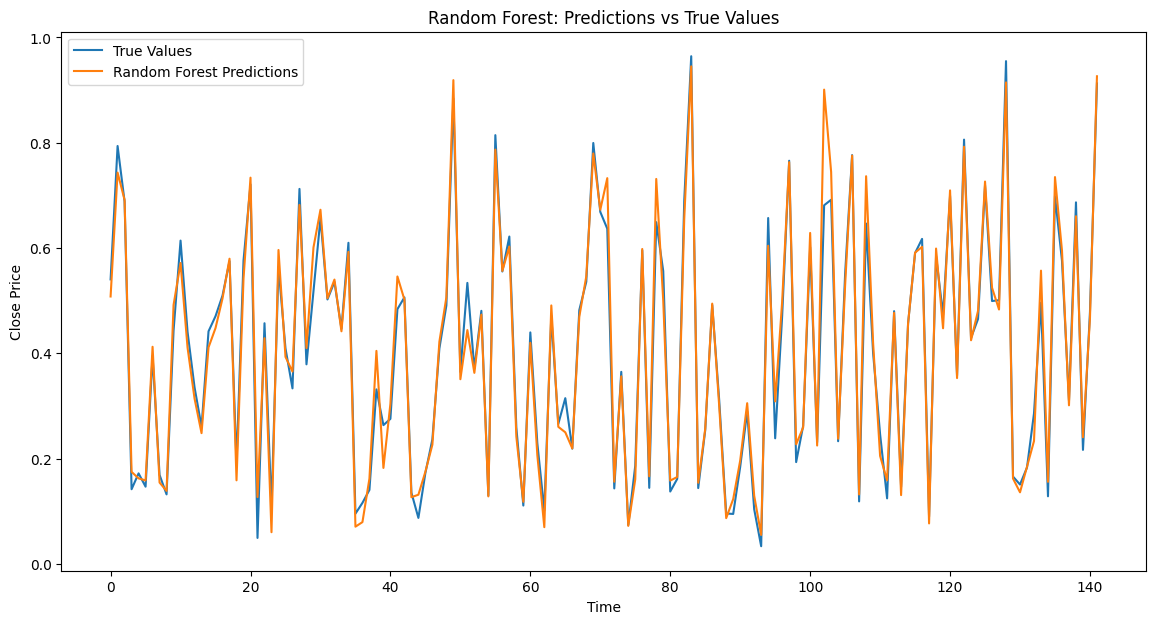

In [103]:
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

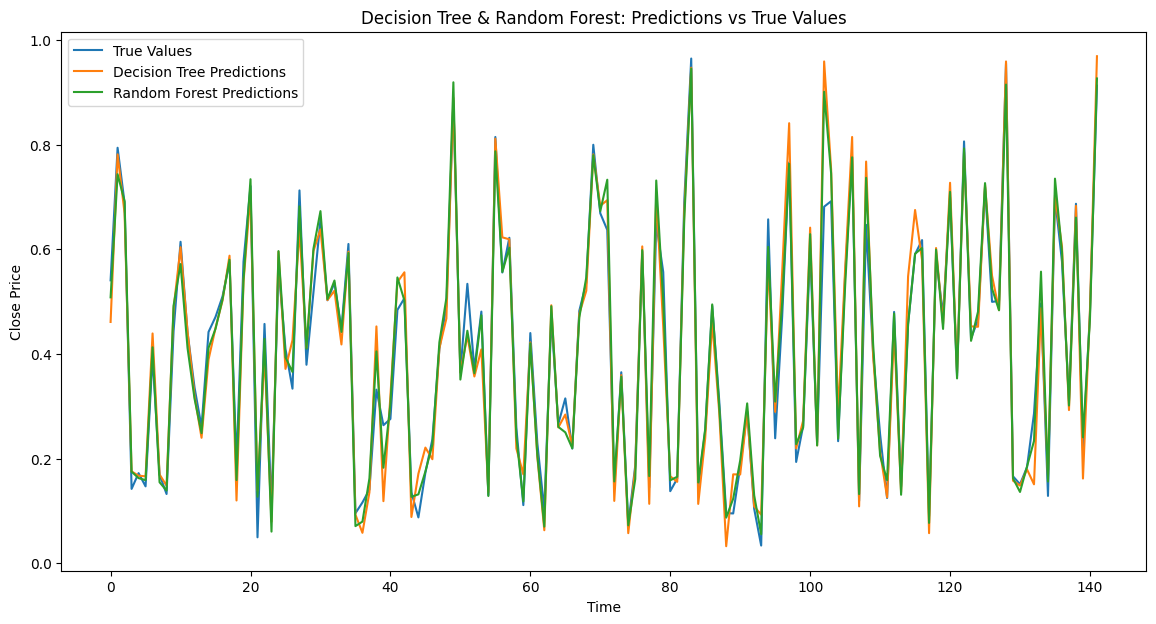

In [104]:
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()